***
***
***

<br><h2>Session 8b | Principal Component Analysis</h2>
<h4>DAT-5303 | Machine Learning</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

***
***
***

<h3>Part I: Introduction and Preparation</h3><br>

<strong>A Note on the Dataset</strong><br>
The dataset in this script represents the annual spending of a subset of the top customers for Apprentice Chef, Inc. The monetary units are unknown, and the demographic information related to each client is as follows:<br><br><br>
<u>Channel</u><br>

1. Online
2. Mobile App

<br>
<u>Region</u><br>

1. Alameda
2. San Francisco
3. Contra Costa

<br><br>
Run the following code to import necessary packages, load data, and set display options. 

In [1]:
########################################
# importing packages
########################################
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


########################################
# loading data and setting display options
########################################
# loading data
customers_df = pd.read_excel('top_customers_subset.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

***
***

<br>
<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this Notebook.

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

***
***

<br>
<strong>Challenge 1</strong><br>
Write code to check information about non-missing values and data types for each column.

In [3]:
# checking information about each column
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Channel         440 non-null    int64
 1   Region          440 non-null    int64
 2   Mediterranean   440 non-null    int64
 3   Vegan           440 non-null    int64
 4   Vegetarian      440 non-null    int64
 5   Middle Eastern  440 non-null    int64
 6   Indian          440 non-null    int64
 7   Wine            440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


***
***

<br>
<strong>Challenge 2</strong><br>
Write code to create a summary of descriptive statistics for each column, rounded to two decimal places.

In [4]:
# summary of decriptive statistics
customers_df.iloc[ : ,  2: ].describe().round(2)

#we dont know raw number
#we can not relay in real number

,Mediterranean,Vegan,Vegetarian,Middle Eastern,Indian,Wine
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


***
***

<br>
<strong>Challenge 3</strong><br>
Write code to create print the value counts for channel and region.

In [5]:
# value counts for channel

print(customers_df['Channel'].value_counts())

print("\n\n")



# value counts for region

print(customers_df['Region'].value_counts())


1    298
2    142
Name: Channel, dtype: int64



3    316
1     77
2     47
Name: Region, dtype: int64


***
***

<br>
<strong>Challenge 4</strong><br>
Write code to display the first ten rows of <strong>customers_df</strong>.

In [6]:
# displaying first ten rows of the dataset
customers_df.head(10)
#Be carfull with the asssumption
#

,Channel,Region,Mediterranean,Vegan,Vegetarian,Middle Eastern,Indian,Wine
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


***
***

<br>
<strong>Datasets with Features for Different Purposes</strong><br>
Notice from the outputs above that the dataset contains demographic data (channel and region) as well purchasing data (spending per category). In unsupervised learning, feature types such as these should not be used together in the same algorithm. Demographic data is extremely different from purchasing data, and their concatenation would bias the results of an analysis. Instead, if a problem requires unsupervised learning and demographic data is present in the dataset, a best practice is to remove the demographic data before building an algorithm. Later, demographic data can be used to compare results.<br><br><br>
<strong>PCA and Scaling</strong><br>
As with KNN, explanatory variables should be scaled before developing a principal component analysis algorithm.<br><br><br>
<strong>Challenge 5</strong><br>
Complete the following in the code below:<br>

* drop demographic data and store the result as purchase_behavior
* instantiate a StandardScaler() object
* fit the scaler object to purchase_behavior
* transform purchase_behavior using the scaler object

In [8]:
# scaling (normalizing) variables before correlation analysis

# dropping demographic information
purchase_behavior = customers_df.drop(['Channel', 'Region'],
                                      axis = 1)


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(purchase_behavior)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(purchase_behavior)

#after scaler they drop the labels
#That is why we do this
# converting scaled data into a DataFrame
purchases_scaled = pd.DataFrame(X_scaled)


# reattaching column names
purchases_scaled.columns = purchase_behavior.columns


# checking pre- and post-scaling variance
print(pd.np.var(purchase_behavior).round(2), '\n\n')
print(pd.np.var(purchases_scaled))

Mediterranean     1.595914e+08
Vegan             5.434617e+07
Vegetarian        9.010485e+07
Middle Eastern    2.351429e+07
Indian            2.268077e+07
Wine              7.934922e+06
dtype: float64 


Mediterranean     1.0
Vegan             1.0
Vegetarian        1.0
Middle Eastern    1.0
Indian            1.0
Wine              1.0
dtype: float64


/Users/stephaniedominguezandrade/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/stephaniedominguezandrade/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


***
***

<br>
<h3>Part II: Exploratory Data Analysis</h3><br>
Run the following code to produce histograms for all features related to purchasing behavior.

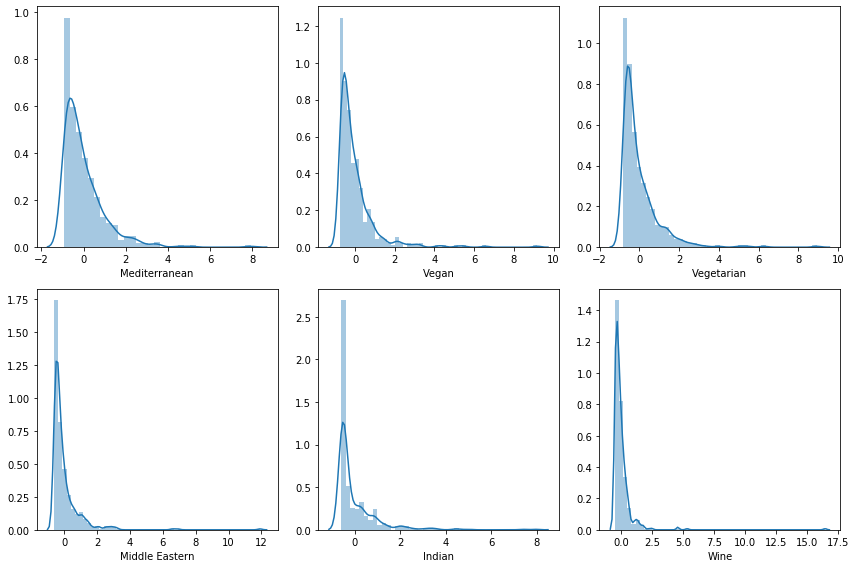

In [9]:
# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))


# initializing a counter
count = 0


# looping to create visualizations
for col in purchases_scaled:

    # condition to break
    if count == 6:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(2, 3, count)
    sns.distplot(a = purchases_scaled[col],
                 hist = True,
                 kde = True)
    
plt.tight_layout()
plt.savefig('purchases_scaled_plots.png')
plt.show()

***
***

<br>
<strong>Challenge 6</strong><br>
Fill in the blanks below to develop a correlation heatmap of the scaled purchasing features.

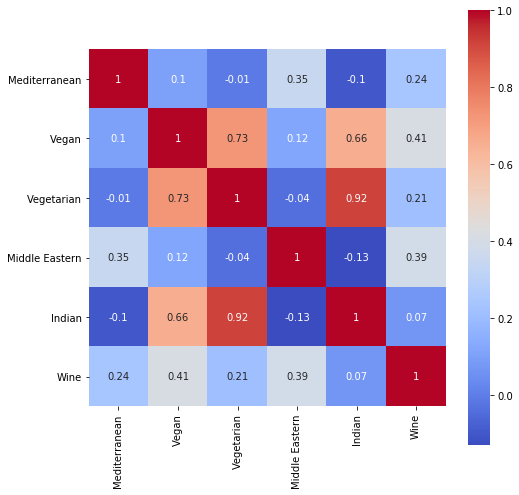

In [10]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = purchases_scaled.corr().round(2)


# creating a correlation heatmap
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True)


# saving and displaying the heatmap
plt.savefig('top_customers_correlation_heatmap.png')
plt.show()

***
***

<br>
Notice that only a few (Pearson) correlations have an absolute value above 0.50. This makes the dataset a good candidate for PCA. As such, we may be able to explain a high degree of variance with a small number of principal components.<br><br>

<h3>Part III: Principal Component Analysis</h3><br>
Principal component analysis is primarily conducted in three situations:<br>

<u>Correlated Explanatory Variables</u><br>
Model building with correlated explanatory variables (i.e. <a href="https://en.wikipedia.org/wiki/Multicollinearity">multicollinearity</a>) is a violation of one of the key assumptions of generalized linear models.<br><br>

<u>Dimensionality Reduction</u><br>
This is commonly conducted when a dataset has a large amount of explanatory variables (i.e. every unique click a user has made on a website). Techniques like PCA allow features to be transformed into principal components, (potentially) reducing the number of features needed to explain a high degree of variance.<br><br>

<u>Latent Trait Exploration</u><br>
Understanding factors that cannot be measured directly through measurable constructs.<br><br>

<strong>Challenge 7</strong><br>
Complete the code to instantiate, fit, and transform a PCA model with no limits to its number of principal components. Make sure to use the scaled dataset for this task.

In [12]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(purchases_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", X_scaled.shape)
print("PCA shape     :",  customer_pca.shape)

Original shape: (440, 6)
PCA shape     : (440, 6)


In [13]:
customer_pca

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

***
***

<br>
<h3>Part IV: Evaluating PCA Algorithms</h3><br>
As can be observed from above, the shape of the data did not change. However, the original DataFrame contains features, whereas the new DataFrame contains principal components. Before analyzing the factor loadings of each principal component, it is important to check each component's explained variance ratio. Also note that the sum of all explained variance ratios should sum to 1.0.<br><br><br>
<strong>Challenge 8</strong><br>
Write code to loop over each principal component, printing its component number as well as its <strong>explained_variance_ratio_</strong>

In [14]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.441
PC 2 : 0.284
PC 3 : 0.123
PC 4 : 0.094
PC 5 : 0.048
PC 6 : 0.01


***
***

<br>
<strong>Challenge 9</strong><br>
Write code to print the sum of all explained variance ratios.

In [15]:
# printing the sum of all explained variance ratios
pca.explained_variance_ratio_.sum()

0.9999999999999999

***
***

<br>
<h3>Scree Plots</h3><br>
One useful tool to visualize the explained variance of each principal component is the scree plot. Our goal in analyzing this plot is to look for a point where there is a drop in the marginal return of explained variance. In other words, we are looking for an "elbow" in the plot, where the line connecting each principal component becomes less steep.<br><br><br>
<strong>Challenge 10</strong><br>
Call the scree_plot function on the PCA object.

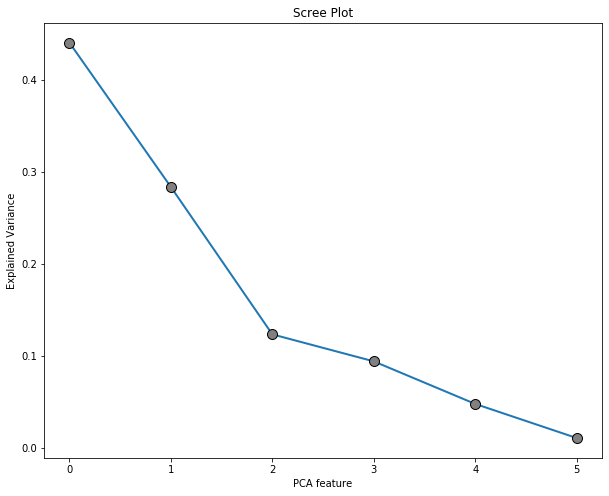

In [18]:
# calling the scree_plot function
scree_plot(pca)

***
***

<br>
<h3>Part V: Interpreting Principal Components and Persona Development</h3><br>
Principal components are essentially "bundles" of various parts of the explanatory variables that were used when building an algorithm. Note that each principal component is not directly measurable, but can be measured indirectly by analyzing its <strong>factor loadings</strong>. In other words, we can interpret the meaning of each principal component by looking into which features are strongly correlated with it.<br><br>
Run the following code and analyze the resulting correlation map between the original features and the principal components.

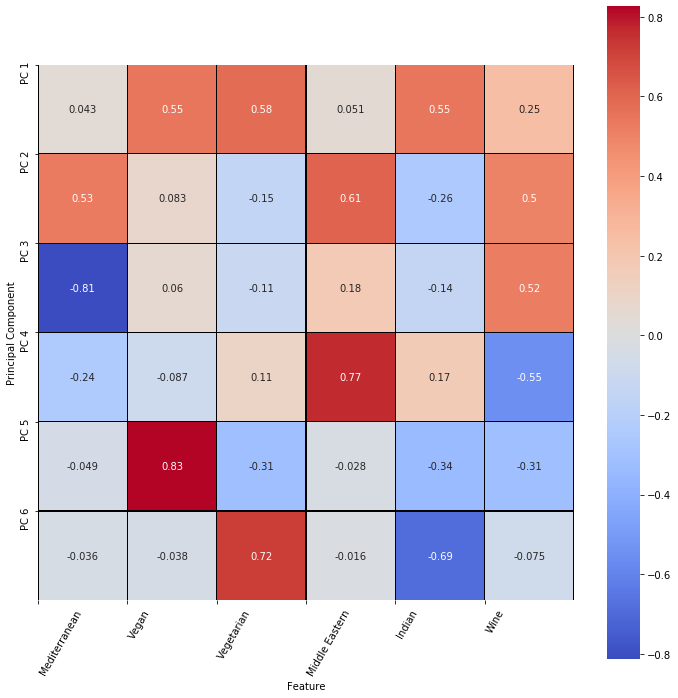

In [19]:
# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options
plt.yticks([0, 1, 2, 3, 4, 5],
           ["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6"])

plt.xticks(range(0, 6),
           customers_df.columns[2:],
           rotation=60,
           ha='left')

plt.xlabel("Feature")
plt.ylabel("Principal Component")


# displaying the plot
plt.show()

***
***

<br>
Each observation in the dataset is a customer of Apprentice Chef, Inc. Therefore, each principal component can be thought of as a <a href="https://www.lexico.com/en/definition/persona">persona</a> to aid in interpretation. Naming personas is subjective and often benefits from working with others.<br><br><br>
<strong>Challenge 11</strong><br>
Run the following code. With your team, analyze the factor loadings and develop a persona for each principal component. When finished, rename the columns of the table with your team's persona names.

In [20]:
# transposing pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(purchases_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
factor_loadings_df.to_excel('customer_factor_loadings.xlsx')

/Users/stephaniedominguezandrade/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


                       0         1         2         3         4         5
Mediterranean   0.042884  0.527932 -0.812257 -0.236686 -0.048683 -0.036025
Vegan           0.545118  0.083168  0.060388 -0.087190  0.826579 -0.038040
Vegetarian      0.579256 -0.146088 -0.108384  0.105987 -0.314999  0.721745
Middle Eastern  0.051189  0.611278  0.178386  0.768683 -0.027932 -0.015637
Indian          0.548640 -0.255233 -0.136192  0.171744 -0.339640 -0.685894
Wine            0.248682  0.504207  0.523904 -0.552065 -0.314701 -0.075134


***

In [21]:
# naming each principal component
factor_loadings_df.columns = ['Herbivores',
                             'Fancy Diners',
                             'Winers',
                             'Traditionalist',
                             'Vegans',
                             "Veggie lovers"]


# checking the result
factor_loadings_df

,Herbivores,Fancy Diners,Winers,Traditionalist,Vegans,Veggie lovers
Mediterranean,0.042884,0.527932,-0.812257,-0.236686,-0.048683,-0.036025
Vegan,0.545118,0.083168,0.060388,-0.087190,0.826579,-0.038040
Vegetarian,0.579256,-0.146088,-0.108384,0.105987,-0.314999,0.721745
Middle Eastern,0.051189,0.611278,0.178386,0.768683,-0.027932,-0.015637
Indian,0.548640,-0.255233,-0.136192,0.171744,-0.339640,-0.685894
Wine,0.248682,0.504207,0.523904,-0.552065,-0.314701,-0.075134


***
***

<br>
<strong>Customer-Level Personas</strong><br>
Earlier in this script we instantiated, fit, and transformed the dataset's original features into principal components:<br><br>

~~~
# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(X_scaled)
~~~

<br>
Now that we have developed personas, we can analyze how much each customer fits into each group. Run the following code to view the personas and factor loadings for each customer.

In [22]:
# converting into a DataFrame 
customer_pca = pd.DataFrame(customer_pca)


# renaming columns
customer_pca.columns = factor_loadings_df.columns


# checking results
customer_pca

,Herbivores,Fancy Diners,Winers,Traditionalist,Vegans,Veggie lovers
0,0.193291,-0.305100,-0.140878,-0.486432,0.495281,-0.007414
1,0.434420,-0.328413,0.319007,-0.178830,0.365579,0.054572
2,0.811143,0.815096,1.523416,-1.254082,-0.379054,-0.277539
3,-0.778648,0.652754,0.163012,0.380060,-0.276138,0.060718
4,0.166287,1.271434,0.066279,-0.826227,-0.394211,-0.026825
5,-0.156170,-0.295141,0.147612,-0.418288,0.479455,-0.053940
6,-0.335288,-0.525003,-0.303195,-0.192047,-0.153340,-0.063923
7,0.140586,-0.230993,0.390010,-0.301346,-0.265691,0.042529
8,-0.517320,-0.659363,0.182510,-0.190881,0.025707,0.091596
9,1.592109,-0.741011,0.210297,-0.080013,-0.122742,0.157314


***
***

<br>
Digging deeper into the DataFrame above can unearth key findings and market opportunities. <strong>This is something expected of you on your final.</strong> As an example, if we were exploring the market potential for customers with a standard deviation of one or above in the Vegan persona, we could do so through subsetting, as in the following code. Try this on other personas and enjoy the exploration :)

In [23]:
customer_pca['Vegans'][customer_pca['Vegans'] > 1.0]

23     1.120418
47     1.631175
56     1.068118
86     5.602746
141    1.082881
254    1.369213
265    1.690438
309    1.329211
319    1.168737
358    1.556939
384    1.339306
427    1.376990
Name: Vegans, dtype: float64

In [25]:
customer_pca.to_excel('costumer-level-pca.xlsx')

***
***

<br>

~~~
 ,--.-,,-,--,             .-._            _,---.                                        
/==/  /|=|  |.--.-. .-.-./==/ \  .-._ _.='.'-,  \  .-.,.---.  ,--.-.  .-,--.            
|==|_ ||=|, /==/ -|/=/  ||==|, \/ /, /==.'-     / /==/  `   \/==/- / /=/_ /             
|==| ,|/=| _|==| ,||=| -||==|-  \|  /==/ -   .-' |==|-, .=., \==\, \/=/. /              
|==|- `-' _ |==|- | =/  ||==| ,  | -|==|_   /_,-.|==|   '='  /\==\  \/ -/               
|==|  _     |==|,  \/ - ||==| -   _ |==|  , \_.' )==|- ,   .'  |==|  ,_/                
|==|   .-. ,\==|-   ,   /|==|  /\ , \==\-  ,    (|==|_  . ,'.  \==\-, /                 
/==/, //=/  /==/ , _  .' /==/, | |- |/==/ _  ,  //==/  /\ ,  ) /==/._/                  
`--`-' `-`--`--`..---'   `--`./  `--``--`------' `--`-`--`--'  `--`-`                   
     _,---.     _,.---._                                                                
  .-`.' ,  \  ,-.' , -  `.   .-.,.---.                                                  
 /==/_  _.-' /==/_,  ,  - \ /==/  `   \                                                 
/==/-  '..-.|==|   .=.     |==|-, .=., |                                                
|==|_ ,    /|==|_ : ;=:  - |==|   '='  /                                                
|==|   .--' |==| , '='     |==|- ,   .'                                                 
|==|-  |     \==\ -    ,_ /|==|_  . ,'.                                                 
/==/   \      '.='. -   .' /==/  /\ ,  )                                                
`--`---'        `--`--''   `--`-`--`--'                                                 
   ,-,--.                _,.----.    _,.----.       ,----.    ,-,--.    ,-,--.   .=-.-. 
 ,-.'-  _\ .--.-. .-.-..' .' -   \ .' .' -   \   ,-.--` , \ ,-.'-  _\ ,-.'-  _\ /==/_ / 
/==/_ ,_.'/==/ -|/=/  /==/  ,  ,-'/==/  ,  ,-'  |==|-  _.-`/==/_ ,_.'/==/_ ,_.'|==|, |  
\==\  \   |==| ,||=| -|==|-   |  .|==|-   |  .  |==|   `.-.\==\  \   \==\  \   |==|  |  
 \==\ -\  |==|- | =/  |==|_   `-' \==|_   `-' \/==/_ ,    / \==\ -\   \==\ -\  /==/. /  
 _\==\ ,\ |==|,  \/ - |==|   _  , |==|   _  , ||==|    .-'  _\==\ ,\  _\==\ ,\ `--`-`   
/==/\/ _ ||==|-   ,   |==\.       |==\.       /|==|_  ,`-._/==/\/ _ |/==/\/ _ | .=.     
\==\ - , //==/ , _  .' `-.`.___.-' `-.`.___.-' /==/ ,     /\==\ - , /\==\ - , /:=; :    
 `--`---' `--`..---'                           `--`-----``  `--`---'  `--`---'  `=`                                                                      
~~~